In [8]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Получение данных об индексе Московской биржи (MOEX)
moex = yf.Ticker("IMOEX.ME")

# Извлечение исторических данных за последний год
moex_data = moex.history(period="1y")

# Сохранение данных в файл CSV
moex_data.to_csv("moex_data.csv")

print("Данные сохранены в файл 'moex_data.csv'")


Данные сохранены в файл 'moex_data.csv'


In [5]:

# Установка периода для сбора данных
start_date = '2022-01-01'
end_date = '2022-12-31'

# Загрузка данных
moex = yf.Ticker("IMOEX.ME")
sp500 = yf.Ticker("^GSPC")
usd_rub = yf.Ticker("USDRUB=X")

# Извлечение исторических данных
moex_data = moex.history(start=start_date, end=end_date)['Close']
sp500_data = sp500.history(start=start_date, end=end_date)['Close']
usd_rub_data = usd_rub.history(start=start_date, end=end_date)['Close']

# Объединение данных в один DataFrame
combined_data = pd.DataFrame(index=moex_data.index)
combined_data['MOEX_Close'] = moex_data
combined_data['SP500_Close'] = sp500_data.reindex(combined_data.index, method='ffill')
combined_data['USD_RUB'] = usd_rub_data.reindex(combined_data.index, method='ffill')

# Вычисление дневных процентных изменений для MOEX
combined_data['MOEX_Percent_Change'] = combined_data['MOEX_Close'].pct_change() * 100

# Обработка отсутствующих данных
combined_data.fillna(method='ffill', inplace=True)

# Сохранение данных в файл CSV
file_name = "combined_market_data.csv"
combined_data.to_csv(file_name)
print(f"Данные сохранены в файл {file_name}")


Данные сохранены в файл combined_market_data.csv


C:\Users\nsedoff\AppData\Local\Temp\ipykernel_24396\3857401241.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)


Среднеквадратическая ошибка (MSE): 93619.27584483709
Коэффициенты модели: [ 1.40753895 -6.1637287 ]
Пересечение (интерсепт): -2892.3347679104654


C:\Users\nsedoff\AppData\Local\Temp\ipykernel_24396\2181573415.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model.coef_, y=['SP500_Close', 'USD_RUB'], palette=colors)


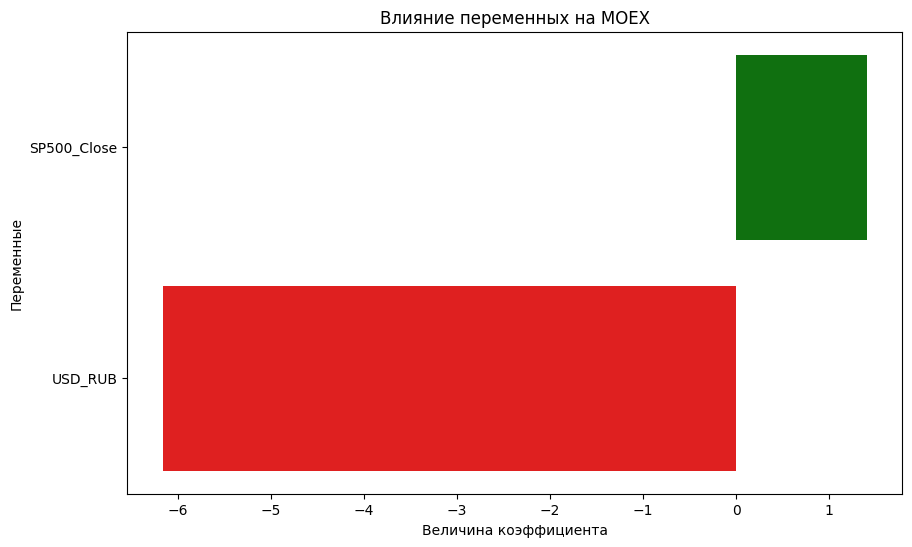

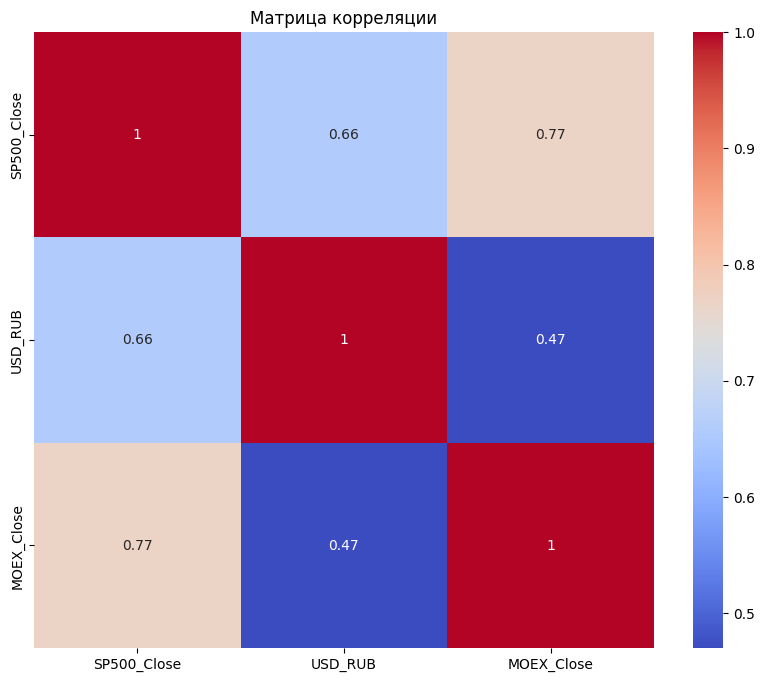

In [11]:

# Загрузка данных
df = pd.read_csv('combined_market_data.csv')

# Удаление строк с отсутствующими данными
df = df.dropna()

# Определение независимых переменных (X) и зависимой переменной (y)
X = df[['SP500_Close', 'USD_RUB']]
y = df['MOEX_Close']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Создание модели линейной регрессии
model = LinearRegression()

# Обучение модели на тренировочных данных
model.fit(X_train, y_train)

# Прогнозирование значений для тестового набора
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)


# Вывод коэффициентов модели и MSE
print(f"Среднеквадратическая ошибка (MSE): {mse}")
print("Коэффициенты модели:", model.coef_)
print("Пересечение (интерсепт):", model.intercept_)

# График важности переменных
plt.figure(figsize=(10, 6))
colors = ['red' if c < 0 else 'green' for c in model.coef_]
sns.barplot(x=model.coef_, y=['SP500_Close', 'USD_RUB'], palette=colors)
plt.title('Влияние переменных на MOEX')
plt.xlabel('Величина коэффициента')
plt.ylabel('Переменные')
plt.show()

# Матрица корреляции
plt.figure(figsize=(10, 8))
correlations = df[['SP500_Close', 'USD_RUB', 'MOEX_Close']].corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()
